In [1]:
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
conn = sqlite3.connect('baseline_v2.0_10yrs.db')
df = pd.read_sql('select night, observationstartmjd from observations;', conn)

Text(0, 0.5, 'N observations')

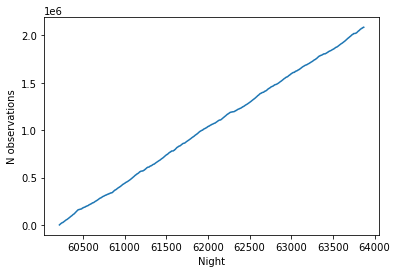

In [3]:
plt.plot(df['observationStartMJD'], np.arange(np.size(df['observationStartMJD']))+1)
plt.xlabel('Night')
plt.ylabel('N observations')

In [4]:
unights = np.unique(df['night'])

In [5]:
# Do a rough observations per hour for each night where there are observations
night = df['night'].values
mjd = df['observationStartMJD'].values
left = np.searchsorted(df['night'], unights)
right = np.searchsorted(df['night'], unights, side='right') - 1

In [6]:
n_obs_per_night = right-left
time_per_night = (mjd[right] - mjd[left])*24
oph = n_obs_per_night/time_per_night

Text(0.5, 1.0, 'Baseline 2.0 beta')

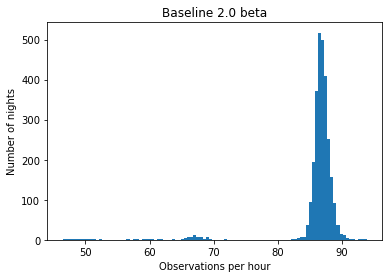

In [7]:
_ack = plt.hist(oph, bins=100)
plt.xlabel('Observations per hour')
plt.ylabel('Number of nights')
plt.title('Baseline 2.0 beta')